In [1]:
import numpy as np
import pandas as pd
import os 
for dirname, _,filenames in os.walk(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv
C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\hourly_data.csv
C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\monthly_data.csv
C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\three_hour_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
daily_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', parse_dates=['DATE'],na_values=['SOD', 'PRECIP', 'other_non_numeric_values'])

print("Daily Data:")
print(daily_data.head())

Daily Data:
       STATION                DATE REPORT_TYPE  SOURCE  BackupElements  \
0  72518014735 2015-01-01 23:59:00       SOD         6             NaN   
1  72518014735 2015-01-02 23:59:00       SOD         6             NaN   
2  72518014735 2015-01-03 23:59:00       SOD         6             NaN   
3  72518014735 2015-01-04 23:59:00       SOD         6             NaN   
4  72518014735 2015-01-05 23:59:00       SOD         6             NaN   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0

In [3]:
print("\nBasic Statistics:")
print(daily_data.describe())


Basic Statistics:
            STATION                           DATE  SOURCE  BackupElements  \
count  2.668000e+03                           2668  2668.0             0.0   
mean   7.251801e+10  2018-10-01 14:07:27.346326784     6.0             NaN   
min    7.251801e+10            2015-01-01 23:59:00     6.0             NaN   
25%    7.251801e+10            2016-11-29 17:59:00     6.0             NaN   
50%    7.251801e+10            2018-10-02 11:59:00     6.0             NaN   
75%    7.251801e+10            2020-08-03 05:59:00     6.0             NaN   
max    7.251801e+10            2022-05-31 23:59:00     6.0             NaN   
std    0.000000e+00                            NaN     0.0             NaN   

       BackupElevation  BackupLatitude  BackupLongitude  \
count           2668.0     2668.000000      2668.000000   
mean             260.0       42.689750       -73.828268   
min              260.0       42.681200       -73.831090   
25%              260.0       42.691800    

In [4]:
import pandas as pd
daily_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])
daily_data['Month'] = daily_data['DATE'].dt.month

monthly_aggregations = daily_data.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})

print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [5]:
average_daily_temperature = daily_data.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()
print("Average Daily Temperature:")
print(average_daily_temperature)

Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


In [6]:
extreme_temperature_days = daily_data[daily_data['DailyMaximumDryBulbTemperature'] > 90]

print("Extreme Temperature Days:")
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

Extreme Temperature Days:
                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


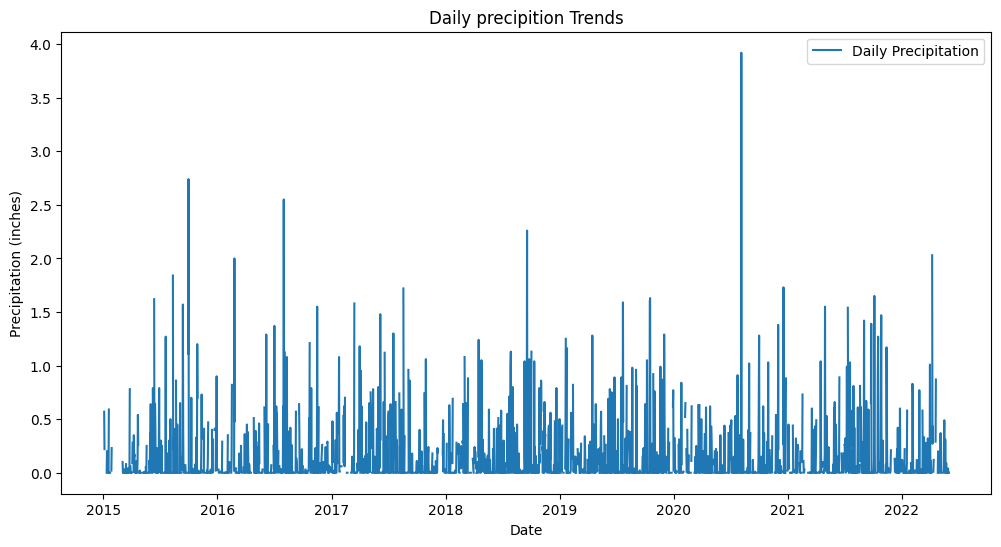

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily precipition Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

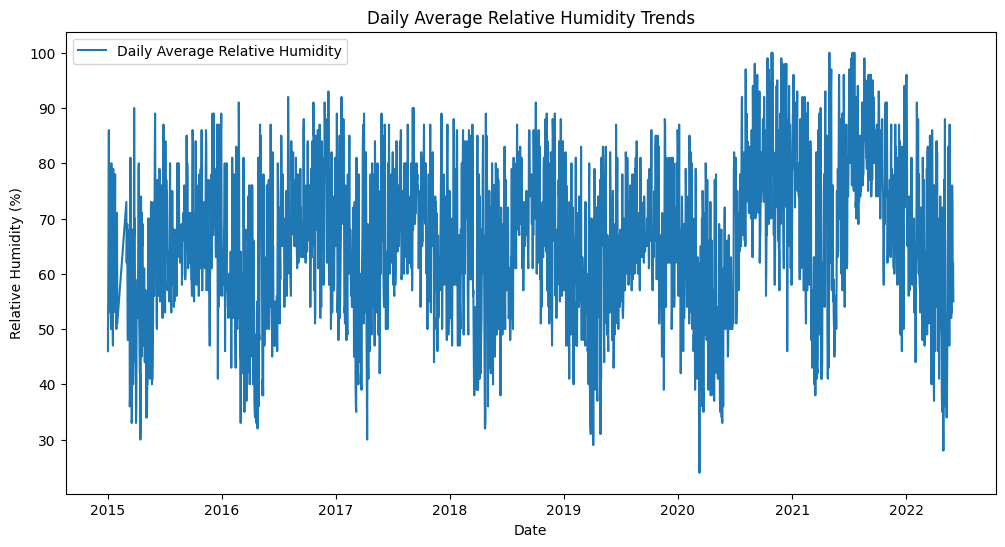

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageRelativeHumidity'], label='Daily Average Relative Humidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

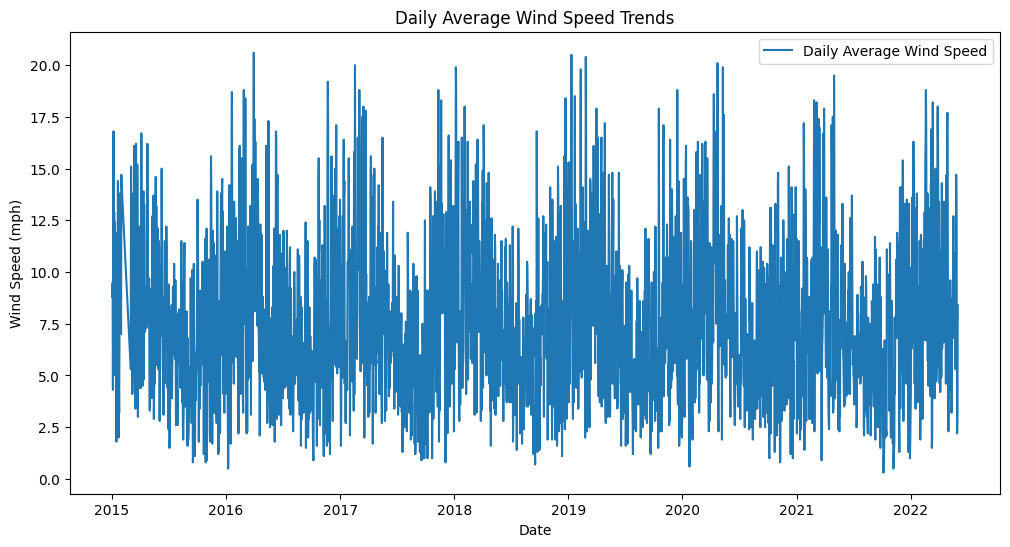

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWindSpeed'], label='Daily Average Wind Speed')
plt.title('Daily Average Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()

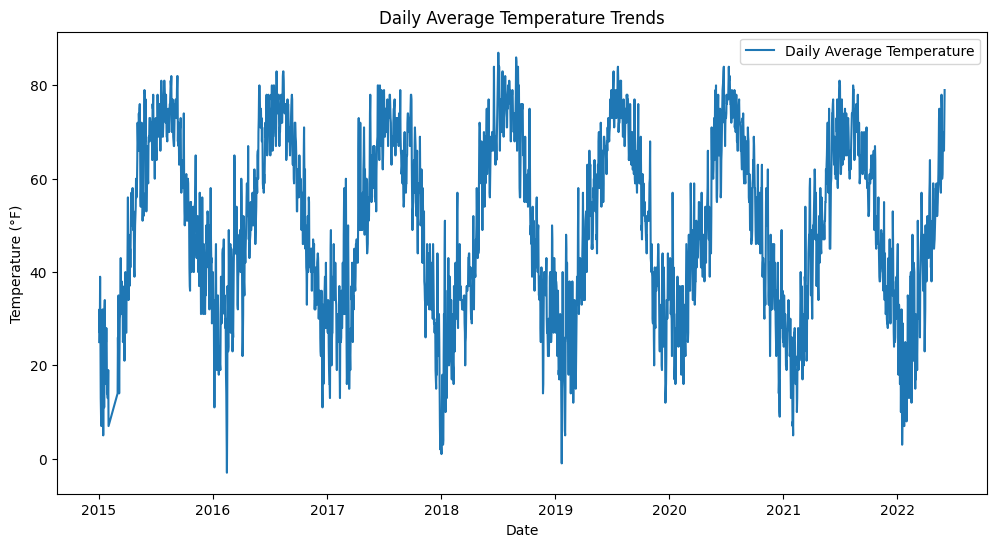

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

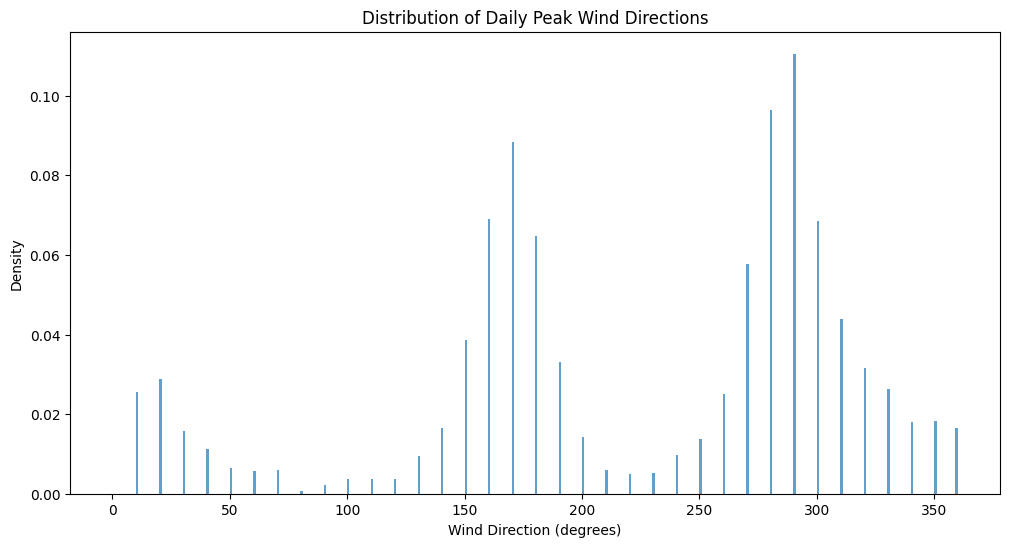

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()

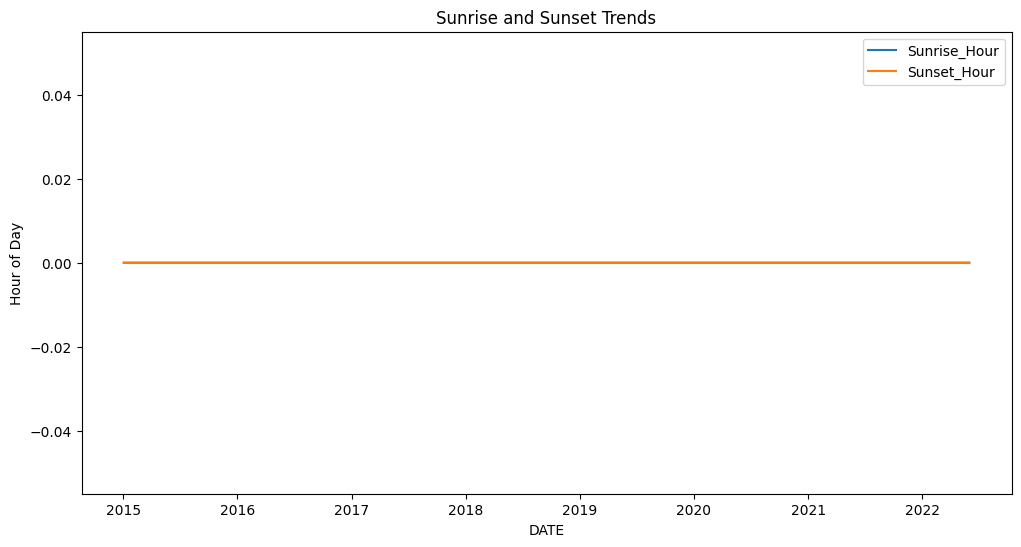

In [13]:
daily_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', parse_dates=['DATE'], na_values=['SOD ', 'PRECIP', 'Other_non_numeric_values'])

daily_data['Sunrise'] = pd.to_datetime(daily_data['Sunrise'], errors='coerce')
daily_data['Sunset'] = pd.to_datetime(daily_data['Sunset'], errors='coerce')

daily_data['Sunrise_Hour'] = daily_data['Sunrise'].dt.hour
daily_data['Sunset_Hour'] = daily_data['Sunset'].dt.hour

plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['Sunrise_Hour'], label='Sunrise_Hour')
plt.plot(daily_data['DATE'], daily_data['Sunset_Hour'], label='Sunset_Hour')
plt.title('Sunrise and Sunset Trends')
plt.xlabel('DATE')
plt.ylabel('Hour of Day')
plt.legend()
plt.show()

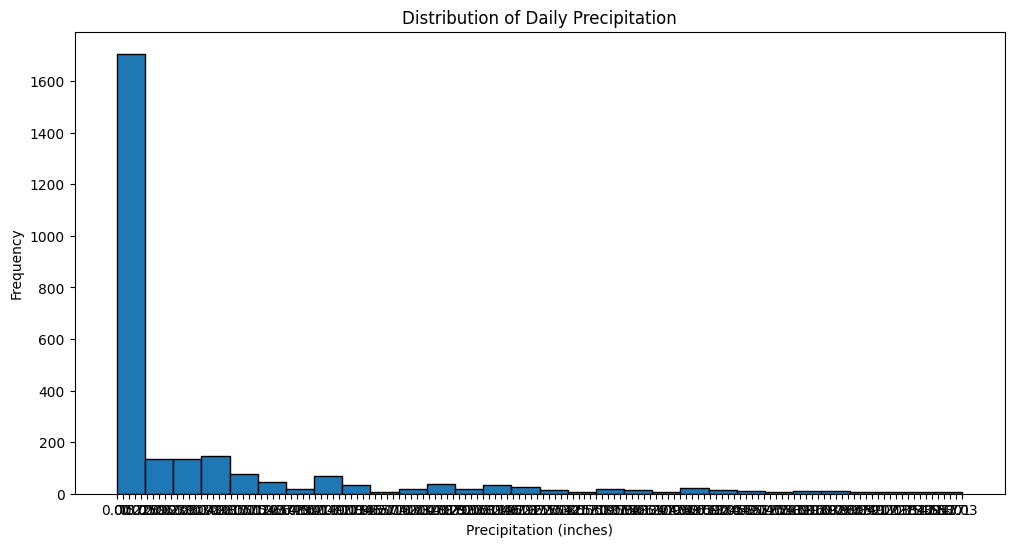

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPrecipitation'].dropna(), bins=30, edgecolor='Black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

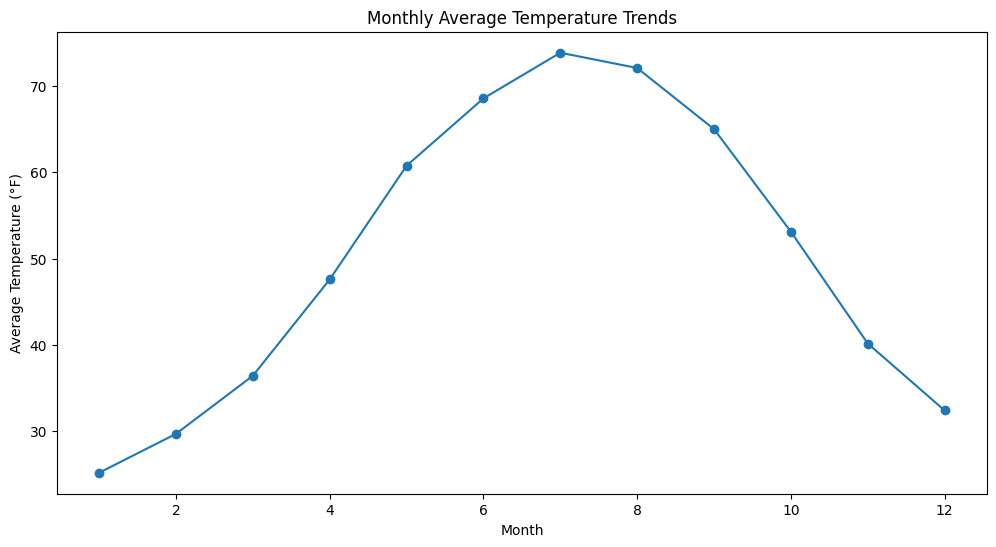

In [15]:
daily_data['Month'] = daily_data['DATE'].dt.month

monthly_temperature = daily_data.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

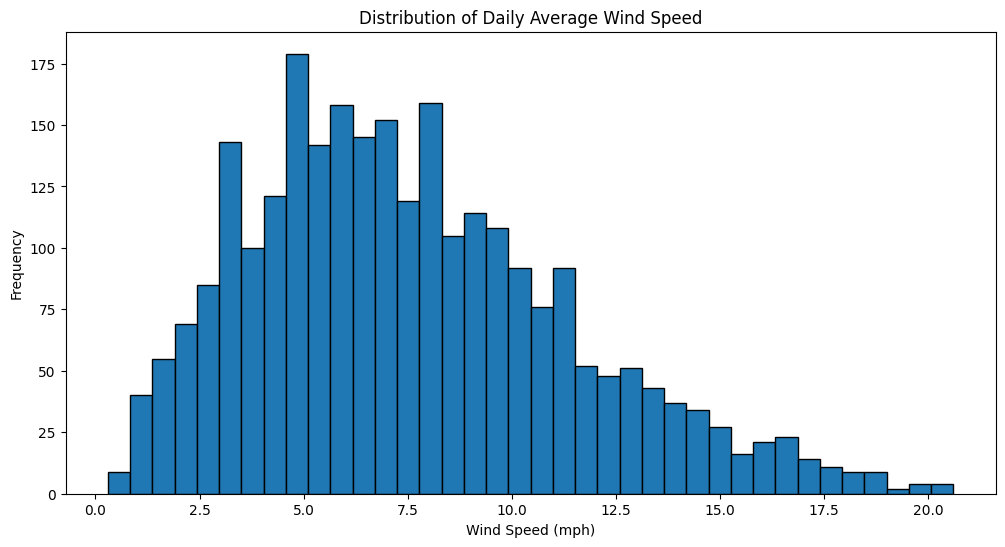

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyAverageWindSpeed'].dropna(), bins=38, edgecolor='black')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

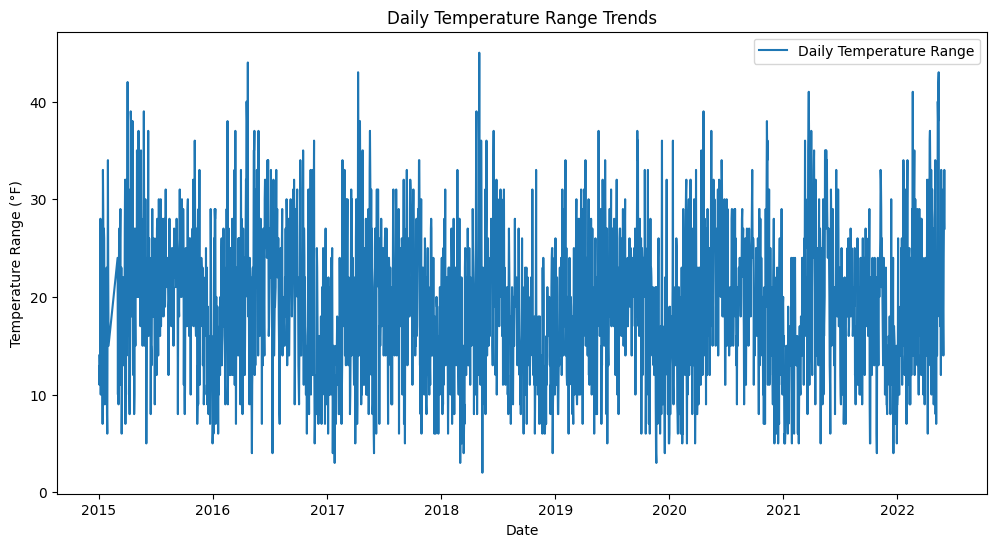

In [17]:
daily_data['TemperatureRange'] = daily_data['DailyMaximumDryBulbTemperature'] - daily_data['DailyMinimumDryBulbTemperature']

plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['TemperatureRange'], label='Daily Temperature Range')
plt.title('Daily Temperature Range Trends')
plt.xlabel('Date')
plt.ylabel('Temperature Range (°F)')
plt.legend()
plt.show()

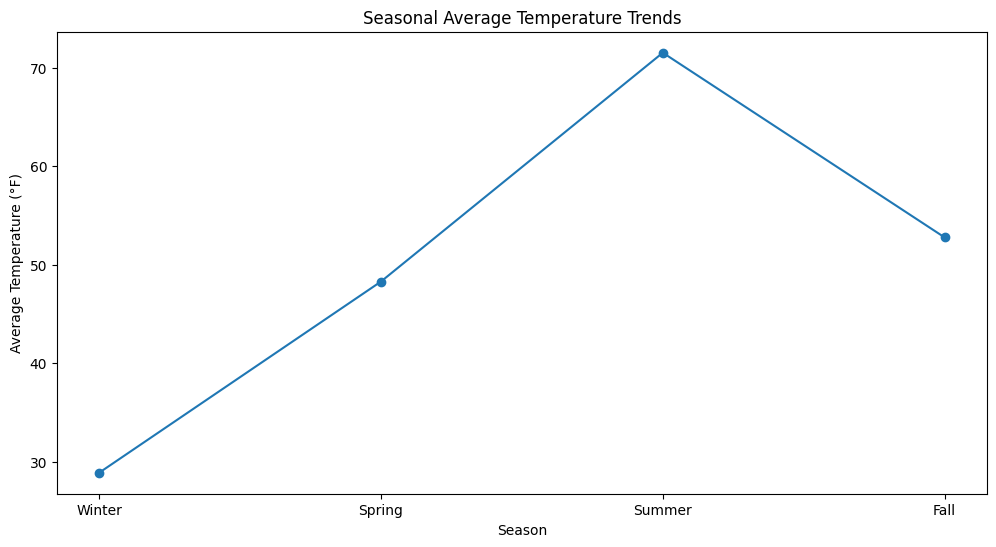

In [18]:
daily_data['Season'] = (daily_data['DATE'].dt.month % 12 + 3) // 3

seasonal_temperature = daily_data.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

plt.figure(figsize=(12, 6))
plt.plot(seasonal_temperature.index, seasonal_temperature.values, marker ='o')
plt.title('Seasonal Average Temperature Trends')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.xticks([1,2,3,4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

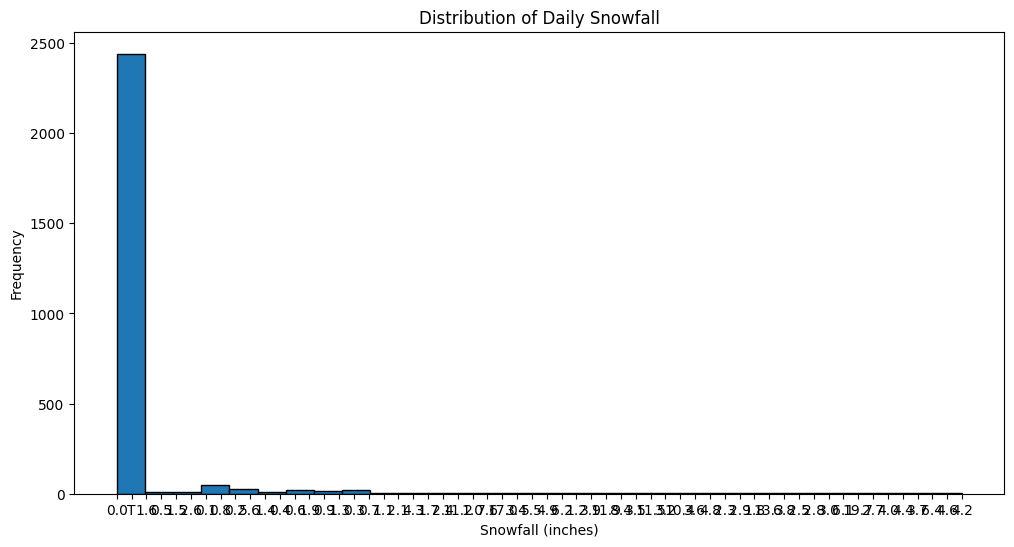

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailySnowfall'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Snowfall')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

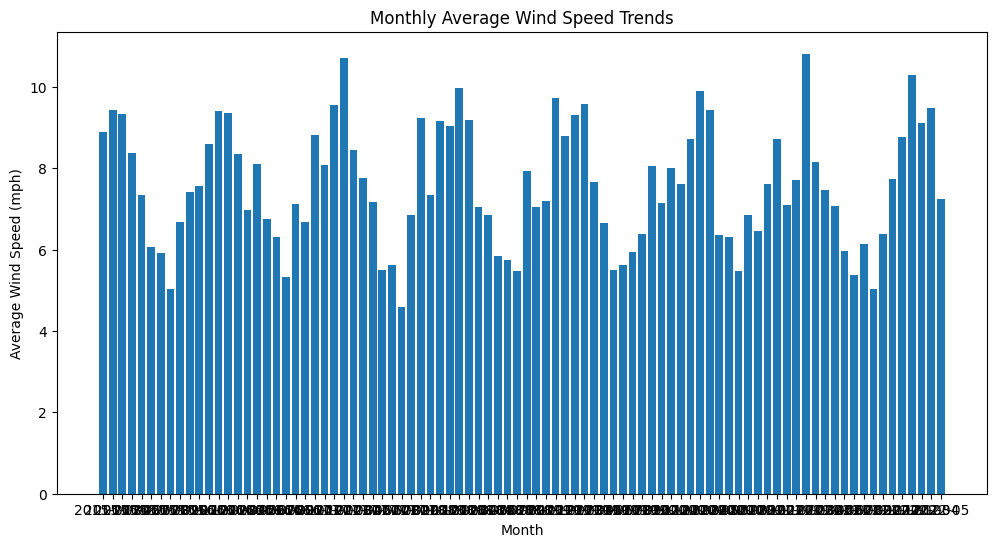

In [20]:
monthly_wind_speed = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyAverageWindSpeed'].mean()

plt.figure(figsize=(12, 6))
plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values)
plt.title('Monthly Average Wind Speed Trends')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

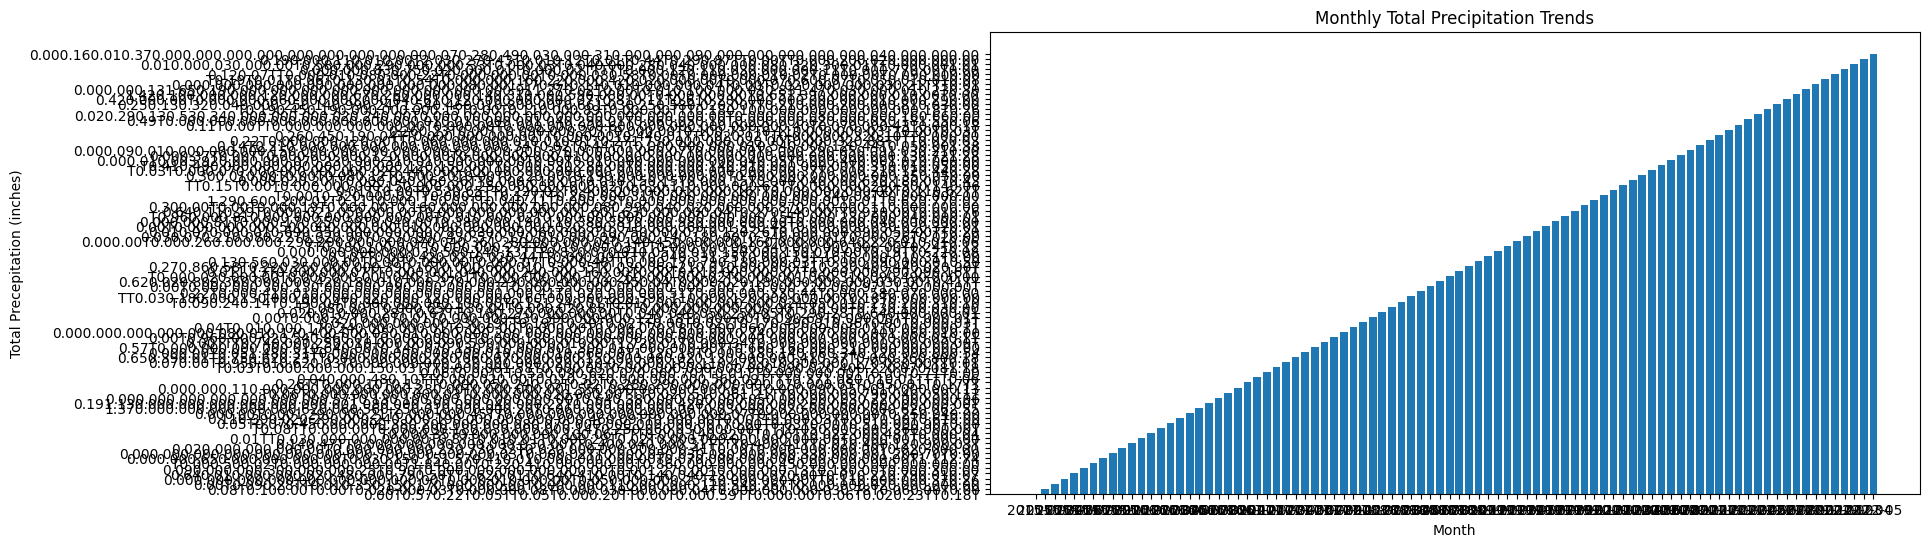

In [21]:
monthly_precipitation = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyPrecipitation'].sum()
plt.figure(figsize=(12, 6))
plt.bar(monthly_precipitation.index.astype(str), monthly_precipitation.values)
plt.title('Monthly Total Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Total Precepitation (inches)')
plt.show()

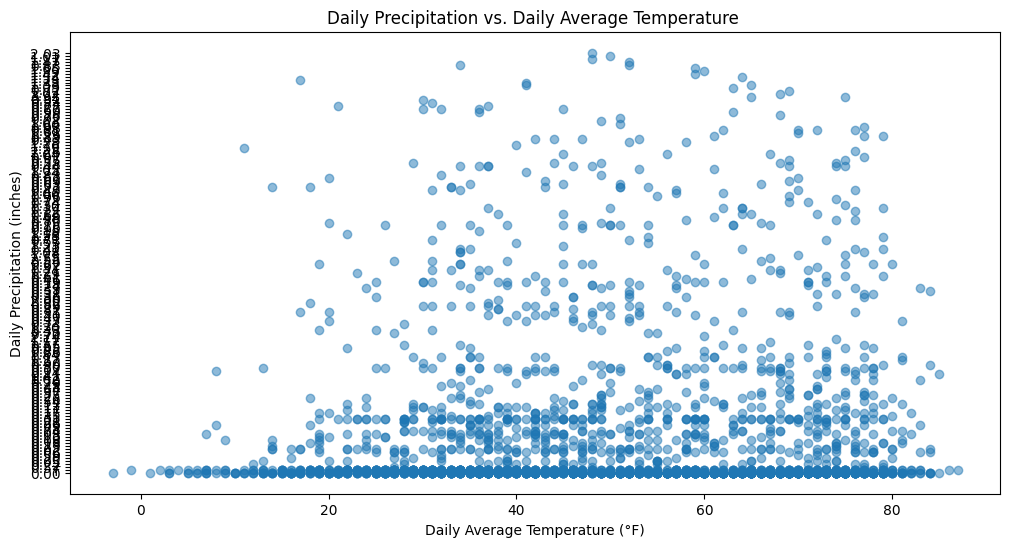

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['DailyAverageDryBulbTemperature'], daily_data['DailyPrecipitation'], alpha=0.5)
plt.title('Daily Precipitation vs. Daily Average Temperature ')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')
plt.show()

In [23]:
import pandas as pd

daily_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\monthly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\three_hour_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

common_columns = set(daily_data.columns) & set(hourly_data.columns) & set(monthly_data.columns) & set(three_hour_data.columns)


print("Common columns:", common_columns)

Common columns: {'DATE', 'BackupName', 'BackupElements', 'REPORT_TYPE', 'BackupLongitude', 'BackupLatitude', 'BackupElevation', 'WindEquipmentChangeDate', 'SOURCE', 'BackupEquipment', 'STATION'}


C:\Users\Shubham Alock\AppData\Local\Temp\ipykernel_16932\332379674.py:4: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


In [24]:
import pandas as pd
daily_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', parse_dates=['DATE'], na_values=['SOD ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', parse_dates=['DATE'], na_values=['SOD ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', parse_dates=['DATE'], na_values=['SOD', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv(r'C:\Users\Shubham Alock\Desktop\Python\Internship 15\Second phase\daily_data.csv', parse_dates=['DATE'], na_values=['SOD', 'PRECIP', 'other_non_numeric_value'])

merged_data = pd.merge(daily_data, hourly_data, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, monthly_data, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, three_hour_data, on='DATE', how='outer', suffixes=('_mergeed', '_three_hour'))

print("Merged Dateset:")
print(merged_data.head())

mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:",mixed_type_columns)

print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)

Merged Dateset:
   STATION_daily                DATE REPORT_TYPE_daily  SOURCE_daily  \
0    72518014735 2015-01-01 23:59:00             SOD               6   
1    72518014735 2015-01-02 23:59:00             SOD               6   
2    72518014735 2015-01-03 23:59:00             SOD               6   
3    72518014735 2015-01-04 23:59:00             SOD               6   
4    72518014735 2015-01-05 23:59:00             SOD               6   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                    260               PLASTIC   
1                   NaN                    260               PLASTIC   
2                   NaN                    260               PLASTIC   
3                   NaN                    260               PLASTIC   
4                   NaN                    260               PLASTIC   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0               42.6918              -73.83109

In [25]:
missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
STATION_daily                                0
DATE                                         0
REPORT_TYPE_daily                            0
SOURCE_daily                                 0
BackupElements_daily                      2668
                                          ... 
DailySustainedWindDirection_three_hour       0
DailySustainedWindSpeed_three_hour           0
Sunrise_three_hour                           0
Sunset_three_hour                            0
WindEquipmentChangeDate_three_hour           0
Length: 125, dtype: int64


In [26]:
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       STATION_daily                           DATE  SOURCE_daily  \
count   2.668000e+03                           2668        2668.0   
mean    7.251801e+10  2018-10-01 14:07:27.346326784           6.0   
min     7.251801e+10            2015-01-01 23:59:00           6.0   
25%     7.251801e+10            2016-11-29 17:59:00           6.0   
50%     7.251801e+10            2018-10-02 11:59:00           6.0   
75%     7.251801e+10            2020-08-03 05:59:00           6.0   
max     7.251801e+10            2022-05-31 23:59:00           6.0   
std     0.000000e+00                            NaN           0.0   

       BackupElements_daily  BackupElevation_daily  BackupLatitude_daily  \
count                   0.0                 2668.0           2668.000000   
mean                    NaN                  260.0             42.689750   
min                     NaN                  260.0             42.681200   
25%                     NaN                  260.0    

In [29]:
import matplotlib.pyplot as plt

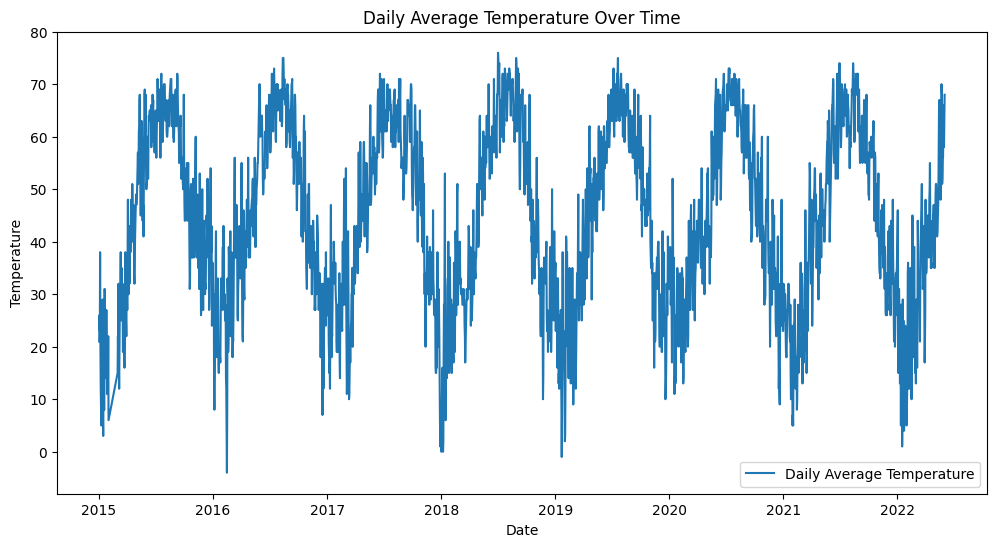

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWetBulbTemperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Average Temperature Over Time')
plt.legend()
plt.show()

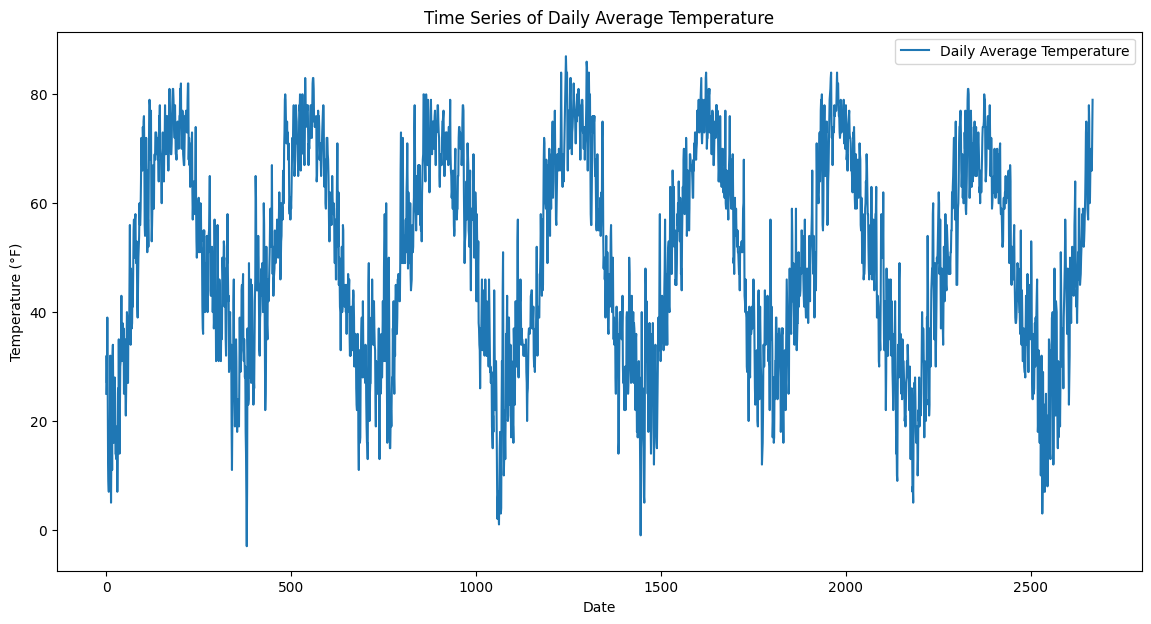

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Time Series of Daily Average Temperature')
plt.legend()
plt.show()

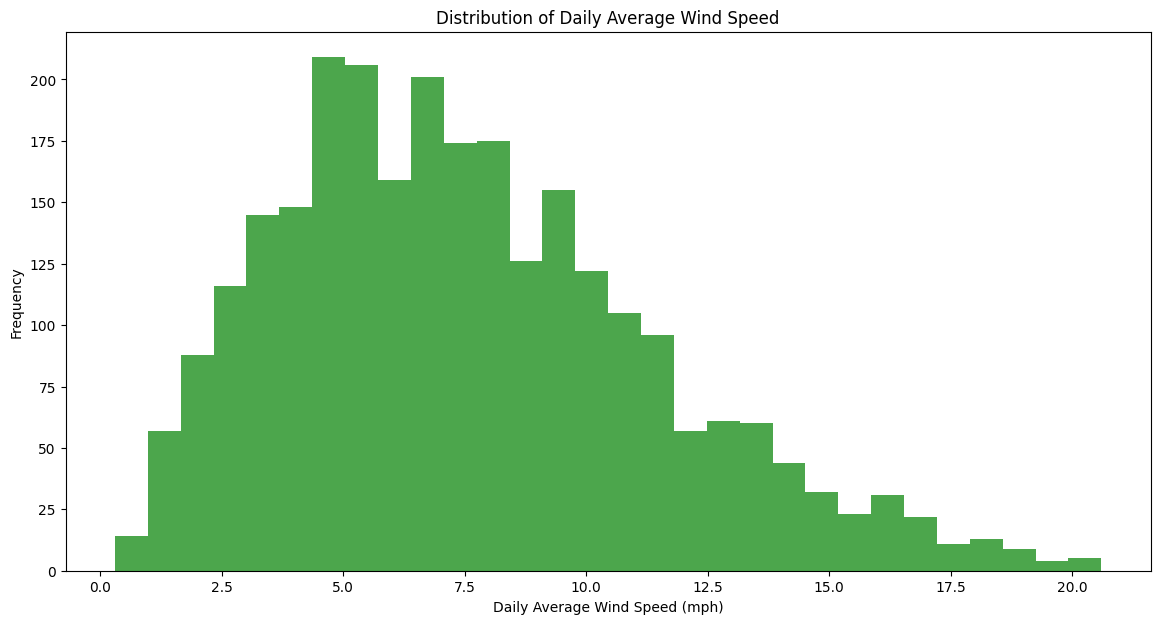

In [32]:
plt.figure(figsize=(14, 7))
plt.hist(daily_data['DailyAverageWindSpeed'], bins=30, color='green', alpha=0.7)
plt.xlabel('Daily Average Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Average Wind Speed')
plt.show()

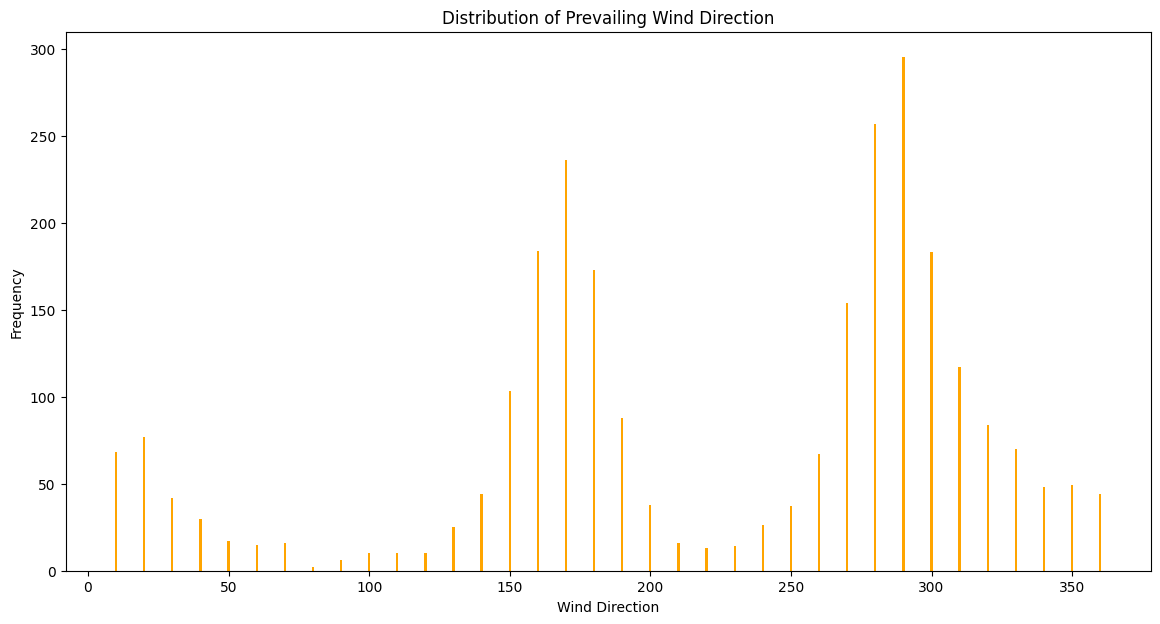

In [33]:
plt.figure(figsize=(14, 7))
plt.bar(daily_data['DailyPeakWindDirection'].value_counts().index, daily_data['DailyPeakWindDirection'].value_counts().values, color='orange')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Distribution of Prevailing Wind Direction')
plt.show()

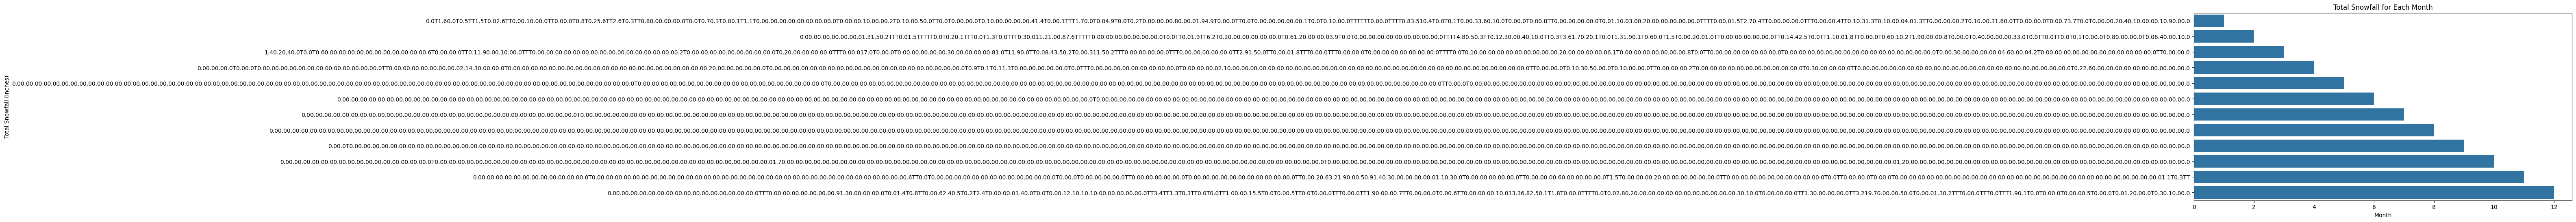

In [34]:
import seaborn as sns
monthly_snowfall = daily_data.groupby(daily_data['DATE'].dt.month)['DailySnowfall'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='DATE', y='DailySnowfall', data=monthly_snowfall)
plt.title('Total Snowfall for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Snowfall (inches)')
plt.show()

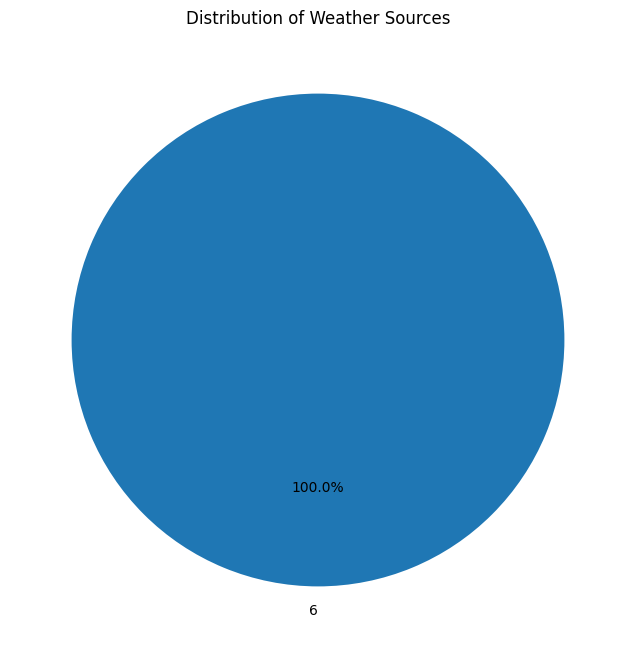

In [35]:
source_distribution = daily_data['SOURCE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Sources')
plt.show()

In [36]:
unique_conditions_daily = daily_data['REPORT_TYPE'].unique()
unique_conditions_hourly = hourly_data['REPORT_TYPE'].unique()
unique_conditions_three_hour = three_hour_data['REPORT_TYPE'].unique()

all_unique_conditions = set(unique_conditions_daily) | set(unique_conditions_hourly) | set(unique_conditions_three_hour)

print("Unique Weather Conditions:")
for condition in all_unique_conditions:
    print(condition)

Unique Weather Conditions:
SOD  


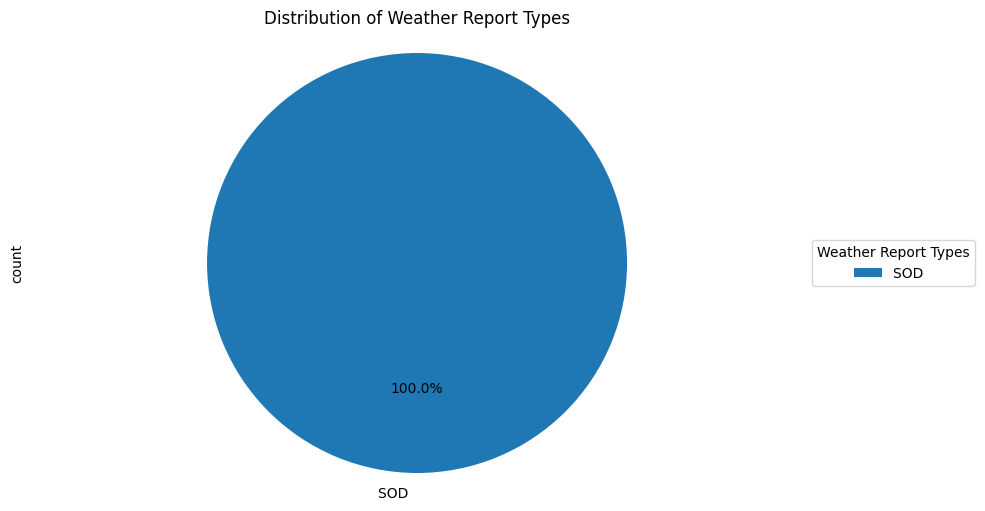

In [37]:
import matplotlib.pyplot as plt

report_types_daily = daily_data['REPORT_TYPE'].value_counts()
report_types_hourly = hourly_data['REPORT_TYPE'].value_counts()
report_types_three_hour = three_hour_data['REPORT_TYPE'].value_counts()


combined_report_types = report_types_daily.add(report_types_hourly, fill_value=0)
combined_report_types = combined_report_types.add(report_types_three_hour, fill_value=0)


plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors
combined_report_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)


plt.legend(combined_report_types.index, title='Weather Report Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Weather Report Types')
plt.axis('equal') 
plt.show()